In [3]:
import os
import sys
import shutil

import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['lines.linewidth'] = 1.25

# import dustpy as dp
from dustpy import Simulation
from dustpy import constants as c

# dustpy_kernels.py in main repo directory, import from there:
main_dir = os.path.dirname(os.path.abspath(""))
sys.path.append(main_dir)
from dustpy_kernels import *

print("Done")

Done


In [7]:
# CONSTANT KERNEL

# create simulation
sim = Simulation()

# Change ini params and initialize simulation

sim.ini.dust.allowDriftingParticles = False
sim.ini.grid.Nr = 3
sim.ini.grid.Nmbpd = 28

sim.initialize()

# Run test coagulation simulation with constant kernel

a = 1.
S0 = 1.

set_constant_kernel(sim, a, S0)
snapshots = np.logspace(-7., 3., 6)
sim.t.snapshots = snapshots

output_dir = "outputs/test_constant_kernel"
shutil.rmtree(output_dir)
sim.writer.datadir = output_dir

sim.run()

# Read output

SigmaConstant = sim.writer.read.sequence("dust.Sigma")
m = sim.writer.read.sequence("grid.m")
t = sim.writer.read.sequence("t")


DustPy v1.0.5

Documentation: https://stammler.github.io/dustpy/
PyPI:          https://pypi.org/project/dustpy/
GitHub:        https://github.com/stammler/dustpy/

Please cite Stammler & Birnstiel (2022).

Checking for mass conservation...

    - Sticking:
        max. rel. error:  5.90e-14
        for particle collision
            m[443] =  6.63e+03 g    with
            m[472] =  7.20e+04 g
    - Full fragmentation:
        max. rel. error:  1.11e-15
        for particle collision
            m[226] =  1.18e-04 g    with
            m[233] =  2.10e-04 g
    - Erosion:
        max. rel. error:  5.44e-15
        for particle collision
            m[431] =  2.47e+03 g    with
            m[462] =  3.16e+04 g

Creating data directory 'outputs/test_constant_kernel'.
Writing file outputs/test_constant_kernel/data0000.hdf5
Writing dump file outputs/test_constant_kernel/frame.dmp
Writing file outputs/test_constant_kernel/data0001.hdf5
Writing dump file outputs/test_constant_kernel/frame.d

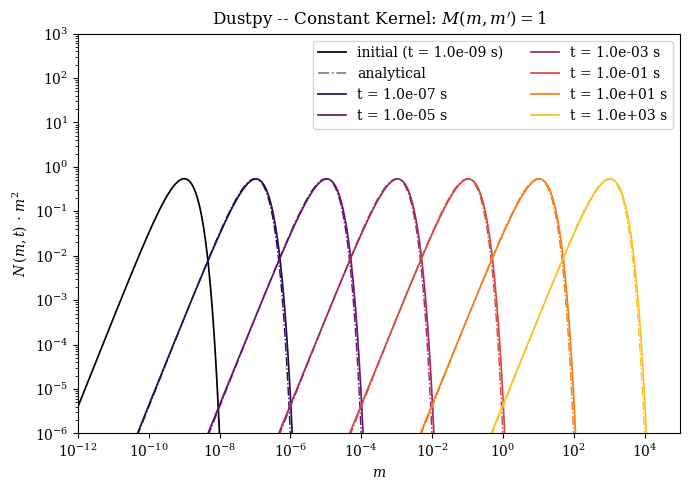

In [9]:
# Plot constant kernel output

fig, ax = plt.subplots(1,1, figsize=(7,5))

ax.loglog(m[0, ...], convert(SigmaConstant[0, 1, :], m[0, ...]), c="black", label="initial (t = 1.0e-09 s)")
ax.plot(0., 0., "-.", c="black", label="analytical", alpha=0.5)

couleurs = plt.cm.inferno(np.linspace(0,1,len(t)+1))
for i in range(1, len(t)):
    cstr = couleurs[i] # "C" + str(i-1)
    ax.loglog(m[i,:], convert(SigmaConstant[i,1,:], m[i,:]), c=cstr, label="t = {:3.1e} s".format(t[i]))
    ax.loglog(m[i,:], solution_constant_kernel(t[i], m[i,:], a, S0), lw=1, ls="-.", c=cstr)

ax.legend(ncol=2)
ax.set_xlim(m[0, 0], m[0, -1])
ax.set_ylim(1.e-6, 1.e3)
ax.set_xlabel(r"$m$", math_fontfamily='dejavuserif')
ax.set_ylabel(r"$N\,\left(m,t\right)\,\cdot\,m^2$", math_fontfamily='dejavuserif')
ax.set_title(r"Dustpy -- Constant Kernel: $M\left( m, m'\right) = 1$", math_fontfamily='dejavuserif')
fig.tight_layout()
plt.savefig(str(sim.writer.datadir)+".pdf")
plt.show()

In [2]:
# LINEAR KERNEL

# create simulation
sim = Simulation()

# Change ini params and initialize simulation

sim.ini.dust.allowDriftingParticles = True
sim.ini.grid.Nr = 3
sim.ini.grid.Nmbpd = 28

sim.initialize()

# Run test coagulation simulation with constant kernel

a = 1.
S0 = 1.

set_linear_kernel(sim, a, S0)
snapshots = np.logspace(0., 1., 6)
sim.t.snapshots = snapshots

output_dir = "outputs/test_linear_kernel"
shutil.rmtree(output_dir)
sim.writer.datadir = output_dir
sim.run()

# Read output

SigmaLinear = sim.writer.read.sequence("dust.Sigma")
m = sim.writer.read.sequence("grid.m")
t = sim.writer.read.sequence("t")


DustPy v1.0.5

Documentation: https://stammler.github.io/dustpy/
PyPI:          https://pypi.org/project/dustpy/
GitHub:        https://github.com/stammler/dustpy/

Please cite Stammler & Birnstiel (2022).

Checking for mass conservation...

    - Sticking:
        max. rel. error:  5.90e-14
        for particle collision
            m[443] =  6.63e+03 g    with
            m[472] =  7.20e+04 g
    - Full fragmentation:
        max. rel. error:  1.11e-15
        for particle collision
            m[226] =  1.18e-04 g    with
            m[233] =  2.10e-04 g
    - Erosion:
        max. rel. error:  5.44e-15
        for particle collision
            m[431] =  2.47e+03 g    with
            m[462] =  3.16e+04 g

Creating data directory 'outputs/test_linear_kernel'.
Writing file outputs/test_linear_kernel/data0002.hdf5
Writing dump file outputs/test_linear_kernel/frame.dmp
Writing file outputs/test_linear_kernel/data0003.hdf5
Writing dump file outputs/test_linear_kernel/frame.dmp
Writing

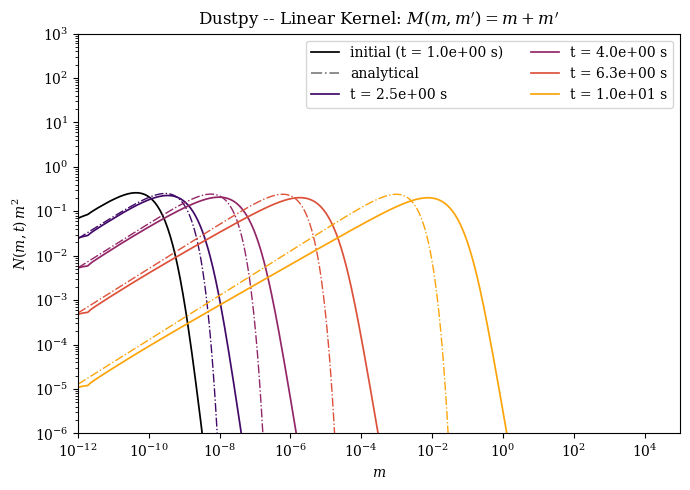

In [3]:
# Plot linear kernel output

fig, ax = plt.subplots(1,1, figsize=(7,5))

ax.loglog(m[0, ...], convert(SigmaLinear[0, 1, :], m[0, ...]), c="black", label="initial (t = 1.0e+00 s)")
ax.plot(0., 0., "-.", c="black", label="analytical", alpha=0.5)

couleurs = plt.cm.inferno(np.linspace(0,1,len(t)+1))
for i in range(1, len(t)):
    cstr = couleurs[i] # "C" + str(i-1)
    ax.loglog(m[i, ...], convert(SigmaLinear[i, 1, :], m[i, ...]), lw=1.25, c=cstr, label="t = {:3.1e} s".format(t[i]))
    ax.loglog(m[i, ...], solution_linear_kernel(t[i], m[i, ...], a, S0), "-.", lw=1, c=cstr)
ax.legend(ncol=2)
ax.set_xlim(m[0, 0], m[0, -1])
ax.set_ylim(1.e-6, 1.e3)
ax.set_xlabel(r"$m$", math_fontfamily='dejavuserif')
ax.set_ylabel(r"$N\left(m,t\right)\, m^2$", math_fontfamily='dejavuserif')
ax.set_title(r"Dustpy -- Linear Kernel: $M\left( m, m'\right) = m + m'$", math_fontfamily='dejavuserif')
fig.tight_layout()
plt.savefig(str(sim.writer.datadir)+".pdf")
plt.show()